https://www.kaggle.com/datasets/muratkokludataset/dry-bean-dataset - Link do Data set

Resumo: Imagens de 13.611 grãos de 7 feijões diferentes registrados foram feitas com uma câmera de alta resolução. Um total de 16 recursos; 12 dimensões e 4 formas de forma, foram obtidas a partir dos grãos.

Informação relevante:
Sete tipos diferentes de grãos secos foram utilizados nesta pesquisa, levando em consideração as características como forma, formato, tipo e estrutura pela situação do mercado. Um sistema de visão computacional foi desenvolvido para distinguir sete diferentes variedades registradas de feijões secos com características semelhantes, a fim de obter uma classificação uniforme das sementes. Para o modelo de classificação, imagens de 13.611 grãos de 7 feijões diferentes registrados foram obtidas com uma câmera de alta resolução. As imagens de feijão obtidas pelo sistema de visão computacional foram submetidas às etapas de segmentação e extração de características, totalizando 16 características; 12 dimensões e 4 formas de forma, foram obtidas a partir dos grãos.

Informações dos atributos:
- 1.) Área (A): A área de uma zona de feijão e o número de pixels dentro de seus limites.
- 2.) Perímetro (P): A circunferência do feijão é definida como o comprimento de sua borda.
- 3.) Comprimento do eixo principal (L): A distância entre as extremidades da linha mais longa que pode ser traçada a partir de um feijão.
- 4.) Comprimento do eixo menor (l): A linha mais longa que pode ser traçada a partir do feijão estando perpendicular ao eixo principal.
- 5.) Proporção (K): Define a relação entre L e l.
- 6.) Excentricidade (Ec): Excentricidade da elipse tendo os mesmos momentos que a região.
- 7.) Área convexa (C): Número de pixels no menor polígono convexo que pode conter a área de uma semente de feijão.
- 8.) Diâmetro equivalente (Ed): O diâmetro de um círculo com a mesma área de uma semente de feijão.
- 9.) Extensão (Ex): A proporção dos pixels na caixa delimitadora para a área do bean.
- 10.) Solidez (S): Também conhecida como convexidade. A proporção dos pixels na casca convexa para aqueles encontrados nos grãos.
- 11.) Arredondamento (R): Calculado com a seguinte fórmula: (4piA)/(P^2)
- 12.)Compactness (CO): Mede a redondeza de um objeto: Ed/L
- 13.)Fator de Forma 1 (SF1)
- 14.)Fator de Forma2 (SF2)
- 15.) Fator de Forma 3 (SF3)
- 16.) Fator de Forma 4 (SF4)
- 17.)Classe (Seker, Barbunya, Bombay, Cali, Dermosan, Horoz e Sira)


In [118]:
#imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn import metrics

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [119]:
#download do dataset
path = "/content/drive/MyDrive/data/Dry_Bean_Dataset.xlsx"

In [120]:
#passando o Dataset para um dataframe em pandas
rVal = pd.read_excel(path)
print(rVal.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [121]:
#Nenhum valor nulo
rVal['Class'].unique()

array(['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'],
      dtype=object)

In [122]:
#transformando os dados de classe para valores numericos
Class=rVal['Class'].unique()
rVal['Class'] = rVal['Class'].replace(['SEKER','BARBUNYA','BOMBAY','CALI','HOROZ','SIRA','DERMASON'],[0,1,2,3,4,5,6])
rVal['Class'].unique()

array([0, 1, 2, 3, 4, 5, 6])

In [123]:
#Separando os dados de entrada e saída
X = rVal.drop(['Class'],axis=1)
y = rVal['Class']
#Fazer a normalização dos dados
from sklearn.preprocessing import scale
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html?highlight=scale#sklearn.preprocessing.scale
X = pd.DataFrame(scale(X.values), columns=X.columns)

In [124]:
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html?highlight=train_test_split#sklearn.model_selection.train_test_split
# Criando teste, validação e treino
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.15, stratify=y, random_state=3)

# Separando treino de validação
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.15, stratify=y_trainval, random_state=5)

In [125]:
X_train, y_train = np.array(X_train), np.array(y_train)
X_val, y_val = np.array(X_val), np.array(y_val)
X_test, y_test = np.array(X_test), np.array(y_test)

In [126]:
print(sorted(Counter(y_train).items()))
print(sorted(Counter(y_val).items()))
print(sorted(Counter(y_test).items()))

[(0, 1465), (1, 955), (2, 377), (3, 1177), (4, 1393), (5, 1904), (6, 2562)]
[(0, 258), (1, 169), (2, 67), (3, 208), (4, 246), (5, 336), (6, 452)]
[(0, 304), (1, 198), (2, 78), (3, 245), (4, 289), (5, 396), (6, 532)]


In [127]:
train_dataset = torch.utils.data.TensorDataset(torch.from_numpy(X_train).float(), torch.from_numpy(y_train).long())
val_dataset = torch.utils.data.TensorDataset(torch.from_numpy(X_val).float(), torch.from_numpy(y_val).long())
test_dataset = torch.utils.data.TensorDataset(torch.from_numpy(X_test).float(), torch.from_numpy(y_test).long())

In [128]:
#criação dos DataLoaders
batch_Size = 64

train_loader = DataLoader(dataset=train_dataset,
                          batch_size=batch_Size,
)
val_loader = DataLoader(dataset=val_dataset, batch_size=batch_Size)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_Size)

In [129]:
inputs, classes = next(iter(train_loader))

In [130]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [131]:
learning_Rate = 0.001
n_Inputs = len(X.columns)
n_Classes = len(rVal['Class'].unique())
#dropout para combate de overfitting
p_dropout = 0.5

#Modelo 1 com peso inicial 0
model = torch.nn.Sequential(
    
    torch.nn.Linear(n_Inputs,256),
    torch.nn.ReLU(),
    torch.nn.Linear(256,256),
    torch.nn.Dropout(p_dropout),

    torch.nn.Linear(256,64),
    torch.nn.ReLU(),
    torch.nn.Linear(64,64),
    torch.nn.Dropout(p_dropout),

    torch.nn.Linear(64,n_Classes),
)
#peso inicial 0
nn.init.constant_(model[0].weight, 0)

model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_Rate)

In [132]:
#Modelo 2 com peso inicial entre -1 e 1
model2 = torch.nn.Sequential(
    
    torch.nn.Linear(n_Inputs,256),
    torch.nn.ReLU(),
    torch.nn.Linear(256,256),
    torch.nn.Dropout(p_dropout),

    torch.nn.Linear(256,64),
    torch.nn.ReLU(),
    torch.nn.Linear(64,64),
    torch.nn.Dropout(p_dropout),

    torch.nn.Linear(64,n_Classes),
)

#peso inicial uniforme entre -1 e 1

nn.init.uniform_(model2[0].weight, a=-1, b=1)
model2.to(device)
optimizer2 = optim.Adam(model2.parameters(), lr=learning_Rate)

In [133]:
#Modelo 3 com peso inicial padrão
model3 = torch.nn.Sequential(
    
    torch.nn.Linear(n_Inputs,256),
    torch.nn.ReLU(),
    torch.nn.Linear(256,256),
    torch.nn.Dropout(p_dropout),

    torch.nn.Linear(256,64),
    torch.nn.ReLU(),
    torch.nn.Linear(64,64),
    torch.nn.Dropout(p_dropout),

    torch.nn.Linear(64,n_Classes),
)
model3.to(device)
optimizer3 = optim.Adam(model3.parameters(), lr=learning_Rate)

In [134]:
def multi_acc(y_pred, y_test):
    y_log_softmax = torch.log_softmax(y_pred, dim = 1)
    _, y_pred_tags = torch.max(y_log_softmax, dim = 1)    

    return 100*(y_pred_tags == y_test).float().mean()    

In [135]:
#criando variáveis para guardar os dados de acuracia e perda
accuracy_stats = {
    'train': [],
    "val": []
}
loss_stats = {
    'train': [],
    "val": []
}

In [136]:
# Definição da função de Treino
def train_model(n_Epochs = 500, verbose = False, modelo = model, otimizador = optimizer): 
  print("Begin training.")
  valid_loss_min =  np.Inf
  valid_acc_min =  0
  count_early_stop = 0
  MAX_early_stop = int(n_Epochs/2)
  for e in range(1, n_Epochs+1):      
    # TRAINING
    train_epoch_loss = 0
    train_epoch_acc = 0
    modelo.train()
    for X_train_batch, y_train_batch in train_loader:
      X_train_batch, y_train_batch = X_train_batch.to(device), y_train_batch.to(device)
      otimizador.zero_grad()      
      y_train_pred = modelo(X_train_batch)
            
      train_loss = criterion(y_train_pred, y_train_batch)
      train_acc = multi_acc(y_train_pred, y_train_batch)
            
      train_loss.backward()
      otimizador.step()
            
      train_epoch_loss += train_loss.item()
      train_epoch_acc += train_acc.item()
            
    # VALIDATION    
    with torch.no_grad():   
      val_epoch_loss = 0
      val_epoch_acc = 0      
      modelo.eval()
      for X_val_batch, y_val_batch in val_loader:
          X_val_batch, y_val_batch = X_val_batch.to(device), y_val_batch.to(device)
                
          y_val_pred = modelo(X_val_batch)
     
          val_loss = criterion(y_val_pred, y_val_batch)
          val_acc = multi_acc(y_val_pred, y_val_batch)           
          val_epoch_loss += val_loss.item()
          val_epoch_acc += val_acc.item()

    loss_stats['train'].append(train_epoch_loss/len(train_loader))
    loss_stats['val'].append(val_epoch_loss/len(val_loader))
    accuracy_stats['train'].append(train_epoch_acc/len(train_loader))
    accuracy_stats['val'].append(val_epoch_acc/len(val_loader))

    if((e==0)|(not(e%(n_Epochs/40)))& verbose):
      print(f'Epoch {e+0:03}: | Train Loss: {train_epoch_loss/len(train_loader):.5f} | Val Loss: {val_epoch_loss/len(val_loader):.5f} | Train Acc: {train_epoch_acc/len(train_loader):.3f}| Val Acc: {val_epoch_acc/len(val_loader):.3f}')
      if count_early_stop == MAX_early_stop:
        break

Begin training.
Epoch 010: | Train Loss: 0.23295 | Val Loss: 0.22874 | Train Acc: 91.672| Val Acc: 90.792
Epoch 020: | Train Loss: 0.21551 | Val Loss: 0.23138 | Train Acc: 92.463| Val Acc: 91.518
Epoch 030: | Train Loss: 0.21189 | Val Loss: 0.23305 | Train Acc: 92.383| Val Acc: 91.406
Epoch 040: | Train Loss: 0.20557 | Val Loss: 0.22707 | Train Acc: 92.682| Val Acc: 91.462
Epoch 050: | Train Loss: 0.20121 | Val Loss: 0.21342 | Train Acc: 92.708| Val Acc: 91.685
Epoch 060: | Train Loss: 0.19765 | Val Loss: 0.21927 | Train Acc: 92.733| Val Acc: 91.797
Epoch 070: | Train Loss: 0.19099 | Val Loss: 0.21832 | Train Acc: 92.992| Val Acc: 91.797
Epoch 080: | Train Loss: 0.18450 | Val Loss: 0.21360 | Train Acc: 93.297| Val Acc: 91.964
Epoch 090: | Train Loss: 0.18312 | Val Loss: 0.22542 | Train Acc: 93.181| Val Acc: 91.964
Epoch 100: | Train Loss: 0.18526 | Val Loss: 0.22646 | Train Acc: 93.094| Val Acc: 91.964
Epoch 110: | Train Loss: 0.17581 | Val Loss: 0.22659 | Train Acc: 93.657| Val Acc: 9

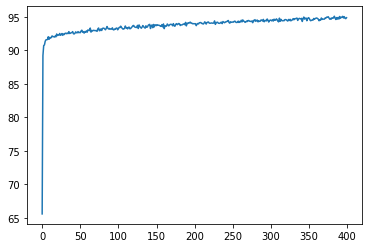

In [137]:
#Treino Modelo 1
loss_stats['train'].clear()
loss_stats['val'].clear()
accuracy_stats['train'].clear()
accuracy_stats['val'].clear()
train_model(400, True, model, optimizer) 
plt.plot(accuracy_stats['train'])

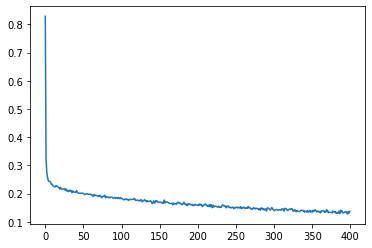

In [138]:
plt.plot(loss_stats['train'])

['SEKER' 'BARBUNYA' 'BOMBAY' 'CALI' 'HOROZ' 'SIRA' 'DERMASON']


Text(0.5, 69.0, 'Modelo')

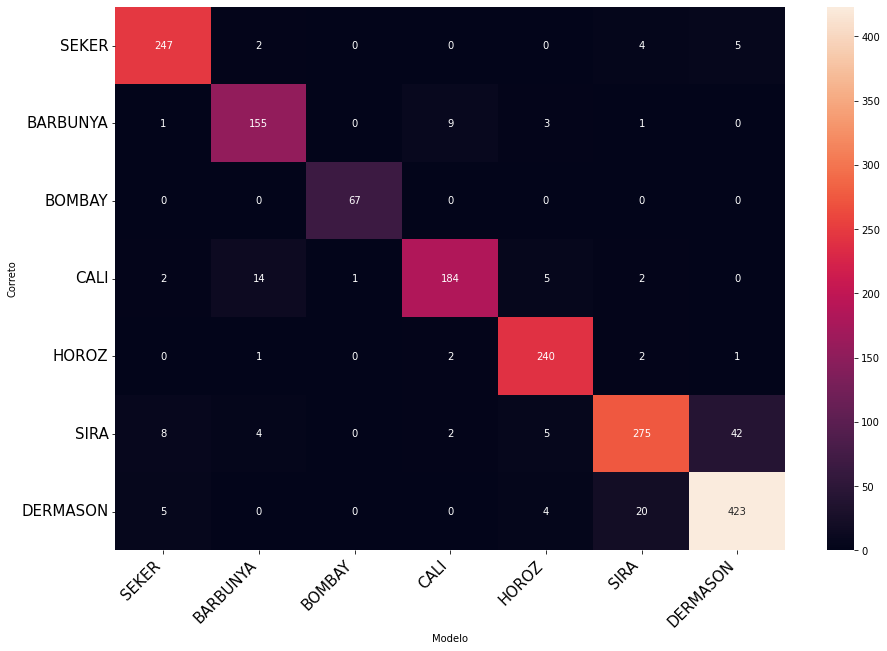

In [139]:
#Matriz do Modelo 1
nb_classes = 7

confusion_matrix = torch.zeros(nb_classes, nb_classes)
with torch.no_grad():
    for i, (inputs, classes) in enumerate(val_loader):
        inputs = inputs.to(device)
        classes = classes.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        for t, p in zip(classes.view(-1), preds.view(-1)):
                confusion_matrix[t.long(), p.long()] += 1

plt.figure(figsize=(15,10))

print(Class)
df_cm = pd.DataFrame(confusion_matrix, index=Class, columns=Class).astype(int)
heatmap = sns.heatmap(df_cm, annot=True, fmt="d")

heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right',fontsize=15)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right',fontsize=15)
plt.ylabel('Correto')
plt.xlabel('Modelo')

Begin training.
Epoch 010: | Train Loss: 0.22209 | Val Loss: 0.22765 | Train Acc: 92.347| Val Acc: 91.629
Epoch 020: | Train Loss: 0.20761 | Val Loss: 0.23363 | Train Acc: 92.662| Val Acc: 91.127
Epoch 030: | Train Loss: 0.20537 | Val Loss: 0.22775 | Train Acc: 92.753| Val Acc: 91.406
Epoch 040: | Train Loss: 0.20086 | Val Loss: 0.23258 | Train Acc: 92.798| Val Acc: 91.685
Epoch 050: | Train Loss: 0.18986 | Val Loss: 0.23233 | Train Acc: 93.033| Val Acc: 91.518
Epoch 060: | Train Loss: 0.19260 | Val Loss: 0.22327 | Train Acc: 92.992| Val Acc: 92.020
Epoch 070: | Train Loss: 0.18451 | Val Loss: 0.23284 | Train Acc: 93.326| Val Acc: 91.406
Epoch 080: | Train Loss: 0.18169 | Val Loss: 0.24532 | Train Acc: 93.333| Val Acc: 91.518
Epoch 090: | Train Loss: 0.17163 | Val Loss: 0.24262 | Train Acc: 93.647| Val Acc: 91.350
Epoch 100: | Train Loss: 0.17279 | Val Loss: 0.24854 | Train Acc: 93.546| Val Acc: 91.741
Epoch 110: | Train Loss: 0.16802 | Val Loss: 0.24052 | Train Acc: 93.627| Val Acc: 9

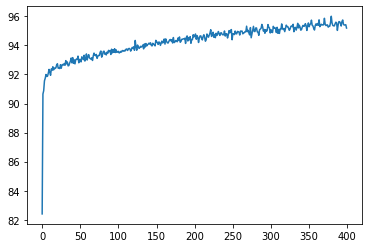

In [140]:
#Treino Modelo 2
loss_stats['train'].clear()
loss_stats['val'].clear()
accuracy_stats['train'].clear()
accuracy_stats['val'].clear()
train_model(400, True, model2, optimizer2) 
plt.plot(accuracy_stats['train'])


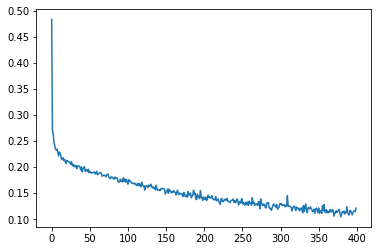

In [141]:
plt.plot(loss_stats['train'])

Text(0.5, 69.0, 'Modelo')

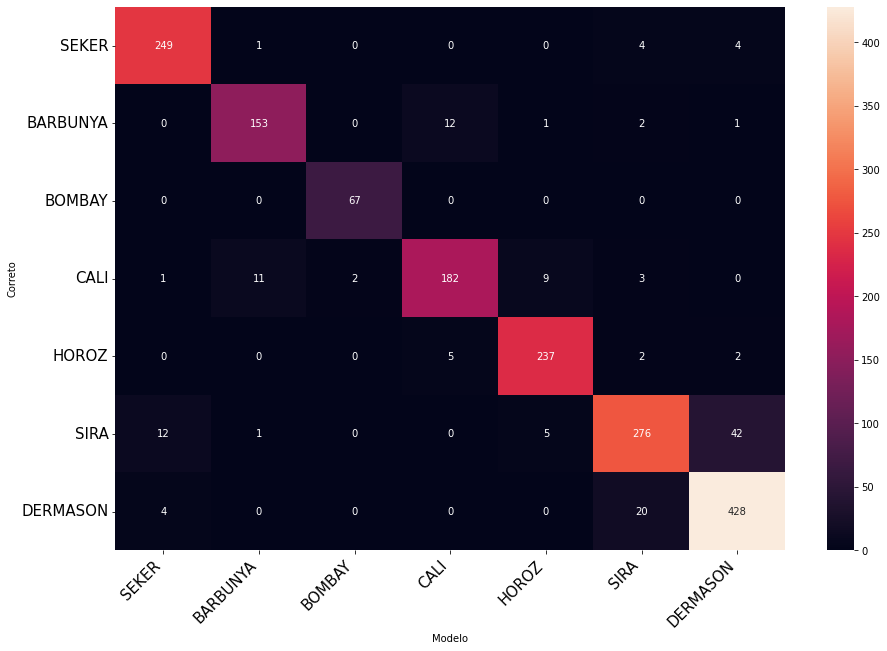

In [142]:
#Matriz do Modelo 2
nb_classes = Class.size

confusion_matrix = torch.zeros(nb_classes, nb_classes)
with torch.no_grad():
    for i, (inputs, classes) in enumerate(val_loader):
        inputs = inputs.to(device)
        classes = classes.to(device)
        outputs = model2(inputs)
        _, preds = torch.max(outputs, 1)
        for t, p in zip(classes.view(-1), preds.view(-1)):
                confusion_matrix[t.long(), p.long()] += 1

plt.figure(figsize=(15,10))

df_cm = pd.DataFrame(confusion_matrix, index=Class, columns=Class).astype(int)
heatmap = sns.heatmap(df_cm, annot=True, fmt="d")

heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right',fontsize=15)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right',fontsize=15)
plt.ylabel('Correto')
plt.xlabel('Modelo')

Begin training.
Epoch 010: | Train Loss: 0.21964 | Val Loss: 0.23487 | Train Acc: 92.307| Val Acc: 91.239
Epoch 020: | Train Loss: 0.20424 | Val Loss: 0.23212 | Train Acc: 92.713| Val Acc: 91.350
Epoch 030: | Train Loss: 0.19578 | Val Loss: 0.23033 | Train Acc: 93.134| Val Acc: 91.406
Epoch 040: | Train Loss: 0.19003 | Val Loss: 0.23203 | Train Acc: 93.072| Val Acc: 91.462
Epoch 050: | Train Loss: 0.18902 | Val Loss: 0.22975 | Train Acc: 93.129| Val Acc: 91.350
Epoch 060: | Train Loss: 0.18436 | Val Loss: 0.22983 | Train Acc: 93.118| Val Acc: 91.797
Epoch 070: | Train Loss: 0.17828 | Val Loss: 0.23275 | Train Acc: 93.576| Val Acc: 91.685
Epoch 080: | Train Loss: 0.17091 | Val Loss: 0.22414 | Train Acc: 93.414| Val Acc: 91.964
Epoch 090: | Train Loss: 0.16681 | Val Loss: 0.21396 | Train Acc: 93.814| Val Acc: 91.964
Epoch 100: | Train Loss: 0.16854 | Val Loss: 0.23121 | Train Acc: 93.884| Val Acc: 92.467
Epoch 110: | Train Loss: 0.16268 | Val Loss: 0.24166 | Train Acc: 93.926| Val Acc: 9

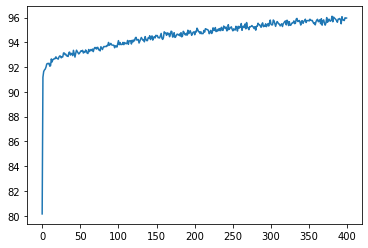

In [143]:
#Treino Modelo 3
loss_stats['train'].clear()
loss_stats['val'].clear()
accuracy_stats['train'].clear()
accuracy_stats['val'].clear()
train_model(400, True, model3, optimizer3) 
plt.plot(accuracy_stats['train'])

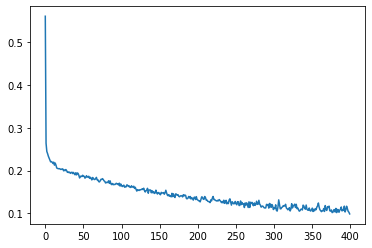

In [144]:
plt.plot(loss_stats['train'])

Text(0.5, 69.0, 'Modelo')

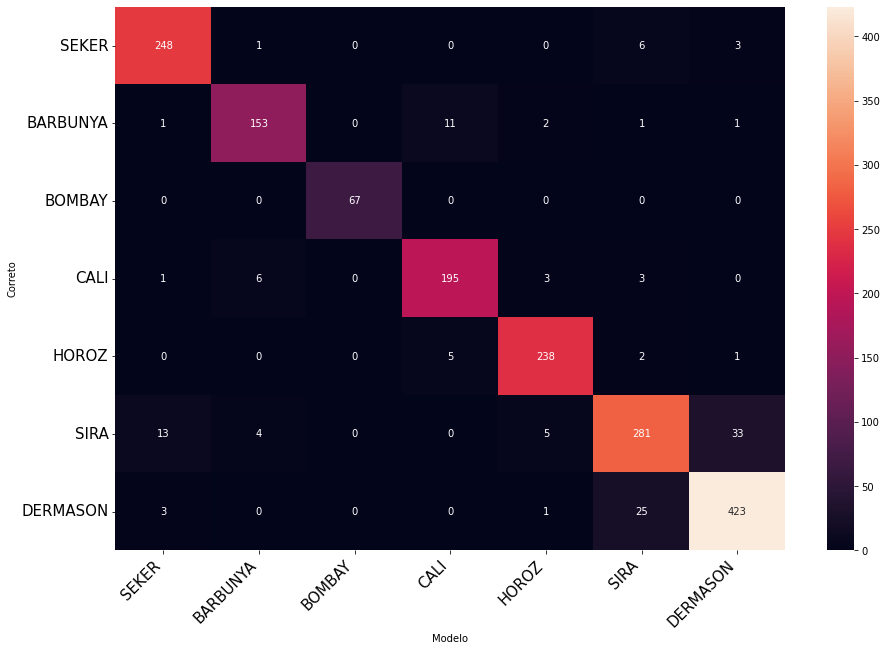

In [145]:
#Matriz do Modelo 3
nb_classes = Class.size

confusion_matrix = torch.zeros(nb_classes, nb_classes)
with torch.no_grad():
    for i, (inputs, classes) in enumerate(val_loader):
        inputs = inputs.to(device)
        classes = classes.to(device)
        outputs = model3(inputs)
        _, preds = torch.max(outputs, 1)
        for t, p in zip(classes.view(-1), preds.view(-1)):
                confusion_matrix[t.long(), p.long()] += 1

plt.figure(figsize=(15,10))

df_cm = pd.DataFrame(confusion_matrix, index=Class, columns=Class).astype(int)
heatmap = sns.heatmap(df_cm, annot=True, fmt="d")

heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right',fontsize=15)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right',fontsize=15)
plt.ylabel('Correto')
plt.xlabel('Modelo')